In [153]:
# Import all libraries
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import numpy as np
import pandas as pd
import pickle
import re
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
import string
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import warnings

warnings.filterwarnings('ignore')
np.set_printoptions(precision=4)

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [154]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [155]:
dataset = 'drive/MyDrive/Bangkit 2022/Capstone Project/Fixed_Dataset.csv'

In [156]:
# Load dataset
#data = pd.read_csv('/content/UpdatedResumeDataSet.csv', engine='python')
data = pd.read_csv(dataset) # Comment this line and uncomment the above line if this does not work for you
#data.head()

**DROP LABELS WHICH HAVING FEW SAMPLES (OPTIONAL)**

In [36]:
# Print unique categories of resumes
kategori = dict(data['title'].value_counts())
print(kategori)
print(len(kategori))

{'CUSTOMER SERVICE REPRESENTATIVE': 205, 'SALES FLOOR ASSOCIATE': 200, 'Flatbed Truck Driving Job - Rider Policy Available': 115, 'Sales Representative': 84, 'KFC Team Member': 79, 'Retail Counter Sales': 75, 'ONLINE MEDICAL BILLING & CODING TRAINING - LEARN FROM HOME': 68, 'Parts Delivery': 56, 'Merchandise Associate': 54, 'Customer Service Representative': 49, 'Hiring Van & Company Drivers - Earn Up To $70k': 43, 'Local CDL A Truck Driver': 42, 'CDL A Delivery Truck Driver - Home Daily!': 41, 'Staff Accountant': 39, 'MEDICAL BILLING & CODING CAREER TRAINING - LOCAL TRAINING AVAILABLE': 39, 'CDL A Truck Driver - Home Daily!': 35, 'ONLINE MEDICAL ASSISTANT CAREER TRAINING - LEARN FROM HOME': 34, 'Sales Executive - B2B - In Person or Remote': 33, 'Administrative Assistant': 33, 'Warehouse Associate': 33, 'CDL A Local Delivery Truck Driver - Home Daily!': 31, 'Retail Merchandiser': 29, 'CDL A Delivery Truck Driver in West Texas': 26, 'Machine Operator': 26, 'MEDICAL ASSISTANT CAREER TRAI

In [37]:
buang = []

for x in kategori:
  if kategori[x] < 10:
    buang.append(x)

print(buang)
print(len(buang))

['Licensed Real Estate Professional', '13J Fire Control Specialist', 'Dentist - DDS / DMD', 'Maintenance Mechanic', 'Pharmacy Technician', 'Real Estate Agent -- Quick Interview Process', 'Retail Sales Associate', 'Company Driver Job', 'Production Associate', 'Independent Sales Representative - Part-Time/Flex Schedule', 'Data Analyst', 'Restaurant Team Member', 'Dedicated Route Driving Job', 'Manufacturing Associate', 'Transportation Security Officer (TSO)', 'Physical Therapist - Travel Contract', 'Maintenance Supervisor', 'Project Coordinator', 'Account Executive', 'Medical Assistant', 'Payroll Administrator', 'Paralegal', 'Restaurant General Manager', 'Warehouse', 'Accounting Manager', '88M Truck Driver', '42A Human Resources Specialist', 'Insurance Agent', 'Class A CDL - Over-the-Road (OTR) Truck Driver', 'Accounts Receivable Clerk', 'Paramedic OR Nurse - LPN, LVN or RN', 'Mac Tools Route Sales / Outside Sales Distributor - Full Training', "Real Estate Buyer's Agent", 'Real Estate Ag

In [38]:
for x in buang:
  kategori.pop(x)

In [39]:
print(kategori)
print(len(kategori))

{'CUSTOMER SERVICE REPRESENTATIVE': 205, 'SALES FLOOR ASSOCIATE': 200, 'Flatbed Truck Driving Job - Rider Policy Available': 115, 'Sales Representative': 84, 'KFC Team Member': 79, 'Retail Counter Sales': 75, 'ONLINE MEDICAL BILLING & CODING TRAINING - LEARN FROM HOME': 68, 'Parts Delivery': 56, 'Merchandise Associate': 54, 'Customer Service Representative': 49, 'Hiring Van & Company Drivers - Earn Up To $70k': 43, 'Local CDL A Truck Driver': 42, 'CDL A Delivery Truck Driver - Home Daily!': 41, 'Staff Accountant': 39, 'MEDICAL BILLING & CODING CAREER TRAINING - LOCAL TRAINING AVAILABLE': 39, 'CDL A Truck Driver - Home Daily!': 35, 'ONLINE MEDICAL ASSISTANT CAREER TRAINING - LEARN FROM HOME': 34, 'Sales Executive - B2B - In Person or Remote': 33, 'Administrative Assistant': 33, 'Warehouse Associate': 33, 'CDL A Local Delivery Truck Driver - Home Daily!': 31, 'Retail Merchandiser': 29, 'CDL A Delivery Truck Driver in West Texas': 26, 'Machine Operator': 26, 'MEDICAL ASSISTANT CAREER TRAI

In [80]:
#print(kategori.keys())
for x in buang:
  data = data[data.title != x]

In [93]:
data = data.reset_index()

In [94]:
data.head()

,index,salary,education,description,title,skills,raw_description,experience,company,employment_type
0,5,NaN,High School,Job Description\nCome work with us at Spencer'...,Sales Associate,"Retailing, Visual Merchandising, Customer Serv...",\n\n<strong>Job Description</strong>\n<p>Come ...,1 to 2 years experience.,Spencer's,PART_TIME
1,25,NaN,2 Year Degree,Job Description\nTrusted Nurse Staffing LLC ha...,Registered Nurse,"Health Facilities, Clinical Works, Registered ...",\n\n<strong>Job Description</strong>\n<p>Trust...,At least 2 years experience.,"Trusted Nurse Staffing, LLC",CONTRACTOR
2,36,$20.00 - $25.00 / hour,Bachelor's Degree,Job Description\nWe seek an experienced Busine...,Business Analyst,"Attention To Detail, Positive Attitude, Schedu...",\n\n<strong>Job Description</strong>\n<p>We se...,At least 3 years experience.,Confidential,CONTRACTOR
3,39,"$75,000.00 - $125,000.00 / year",NaN,Job Description\nIMMEDIATE HIRE\n\nLife insura...,Sales Representative,"Spanish Language, French Languages, English La...",\n\n<strong>Job Description</strong>\n<h4 styl...,At least 1 year experience.,Family First Life,FULL_TIME
4,43,NaN,NaN,Job Description\n ***Top Sales Commission Off...,Sales Representative - In Person/Remote,"Advertising, Scheduling, Marketing, Sales, Sel...",\n\n<strong>Job Description</strong>\n<p class...,NaN,Best Version Media,FULL_TIME


**BACK INTO THE MAIN**

In [157]:
data_size = len(data)
print(data_size)

10501


In [158]:
#data.head()

In [159]:
# Get set of stopwords
from nltk.corpus import stopwords
stopwords_set = set(stopwords.words('english')+['``',"''"])

In [160]:
# Function to clean resume text
def clean_text(resume_text):
    resume_text = re.sub('http\S+\s*', ' ', resume_text)  # remove URLs
    resume_text = re.sub('RT|cc', ' ', resume_text)  # remove RT and cc
    resume_text = re.sub('#\S+', '', resume_text)  # remove hashtags
    resume_text = re.sub('@\S+', '  ', resume_text)  # remove mentions
    resume_text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@
    [\]^_`{|}~"""), ' ', resume_text)  # remove punctuations
    resume_text = re.sub(r'[^\x00-\x7f]',r' ', resume_text) 
    resume_text = re.sub('\s+', ' ', resume_text)  # remove extra whitespace
    resume_text = resume_text.lower()  # convert to lowercase
    resume_text_tokens = word_tokenize(resume_text)  # tokenize
    filtered_text = [w for w in resume_text_tokens if not w in stopwords_set]
    # remove stopwords
    return ' '.join(filtered_text)


In [161]:
# Print a sample original feature and label
print(data['description'][0])
print(data['title'][0])

Job Description
To implement the Head Start Performance Standards in the overall management of the classroom, including promoting social, physical, and intellectual growth, providing a safe, healthy environment that is developmentally, linguistically and culturally appropriate. Responsible for oversight of assistant teacher and classroom volunteers.

Job Requirements
The above description covers the principle functions of the job. It is not intended to be a complete listing of all the miscellaneous incidental or substantially similar duties, which may be assigned during normal or emergency operations.
Head Start Teacher


In [162]:
# Clean the description
data['cleaned_description'] = data.description.apply(lambda x: clean_text(x))
print(data['cleaned_description'][0])

data['cleaned_title'] = data.title.apply(lambda x: clean_text(x))
print(data['cleaned_title'][0])

job description implement head start performance standards overall management classroom including promoting social physical intellectual growth providing safe healthy environment developmentally linguistically culturally appropriate responsible oversight assistant teacher classroom volunteers job requirements nys teacher certification preferred bachelor rsquo degree early childhood education one two years experience teaching early childhood setting requires working level knowledge early childhood developmentally appropriate practices requires administrative analytical evaluative oral written communication skills aptitude training motivating people requires proficiency use personal computer requires health physical capability work office classroom including sitting floor child sized chairs bending running climbing stairs lift children weighing 40 lbs requires ess reliable transportation employees abc early childhood services division must receive maintain full clearance justice center n

In [163]:
# Get features and labels from data and shuffle
features = data['cleaned_description'].values
#print(features)
original_labels = data['cleaned_title'].values
#print(original_labels)
labels = original_labels[:]
#print(labels)

for i in range(data_size):
  labels[i] = str(labels[i].lower())  # convert to lowercase
  labels[i] = labels[i].replace(" ", "")  # use hyphens to convert multi-token labels into single tokens
#print(labels)

import random
random.seed(20)
features, labels = shuffle(features, labels, random_state=20)

# Print example feature and label
print(features[0])
print(labels[0])

job description different driving chalk mountain earn 100 000 annually get home daily company cares safety well plus whole lot call learn sets chalk apart 3 000 sign bonus addition great pay offering drivers incentive bonus based great productivity safety come learn future chalk mountain chalk mountain hiring experienced local class cdl truck drivers west texas earn top hourly pay driving industry oilfield trucking job get paid hourly rate orientation class cdl drivers expect earn 100 000 get paid hourly mile job training refresher courses available 401 k company match medical dental vision disability paid time 90 days safe work environment scheduled days guaranteed home time quality equipment power units run 2 5 year trade cycle outstanding maintenance program top covid protocol safe environment drivers must least 23 years old 12 months experience last 18 months 18 months experience last 3 years required housing available west texas location call details call speak recruiter phone num

In [164]:
# Split for train and test
train_split = 0.8
train_size = int(train_split * data_size)

train_features = features[:train_size]
train_labels = labels[:train_size]

test_features = features[train_size:]
test_labels = labels[train_size:]

# Print size of each split
print(len(train_labels))
print(len(test_labels))

8400
2101


In [165]:
# Tokenize feature data and print word dictionary
vocab_size = 13000
oov_tok = '<OOV>'

feature_tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
feature_tokenizer.fit_on_texts(features)

feature_index = feature_tokenizer.word_index
print(dict(list(feature_index.items())))

# Print example sequences from train and test datasets
train_feature_sequences = feature_tokenizer.texts_to_sequences(train_features)
print(train_feature_sequences[0])

test_feature_sequences = feature_tokenizer.texts_to_sequences(test_features)
print(test_feature_sequences[0])

{'<OOV>': 1, 'job': 2, 'work': 3, 'experience': 4, 'time': 5, 'skills': 6, 'team': 7, 'customer': 8, 'description': 9, 'ability': 10, 'service': 11, 'care': 12, 'required': 13, 'requirements': 14, 'company': 15, 'must': 16, 'training': 17, 'opportunity': 18, 'health': 19, 'medical': 20, 'business': 21, 'sales': 22, 'provide': 23, 'benefits': 24, 'management': 25, 'years': 26, 'environment': 27, 'working': 28, 'including': 29, 'career': 30, 'position': 31, 'support': 32, 'customers': 33, 'link': 34, 'new': 35, 'removed': 36, 'services': 37, 'amazon': 38, 'safety': 39, 'day': 40, 'duties': 41, 'pay': 42, 'full': 43, 'one': 44, 'high': 45, 'patient': 46, 'information': 47, 'status': 48, 'home': 49, 'equipment': 50, 'quality': 51, 'may': 52, 'employees': 53, 'knowledge': 54, 'part': 55, 'employment': 56, 'us': 57, 'responsibilities': 58, 'employer': 59, 'people': 60, 'include': 61, 'able': 62, 'level': 63, 'store': 64, 'responsible': 65, 'get': 66, 'opportunities': 67, 'shift': 68, 'equal'

In [166]:
# Tokenize label data and print label dictionary
label_tokenizer = Tokenizer(lower=True)
label_tokenizer.fit_on_texts(labels)

label_index = label_tokenizer.word_index
print(dict(list(label_index.items())))

# Print example label encodings from train and test datasets
train_label_sequences = label_tokenizer.texts_to_sequences(train_labels)
print(train_label_sequences[0])

test_label_sequences = label_tokenizer.texts_to_sequences(test_labels)
print(test_label_sequences[0])

{'customerservicerepresentative': 1, 'salesfloorassociate': 2, 'flatbedtruckdrivingjobriderpolicyavailable': 3, 'salesrepresentative': 4, 'kfcteammember': 5, 'retailcountersales': 6, 'onlinemedicalbillingcodingtraininglearnhome': 7, 'partsdelivery': 8, 'merchandiseassociate': 9, 'hiringvancompanydriversearn70k': 10, 'localcdltruckdriver': 11, 'cdldeliverytruckdriverhomedaily': 12, 'medicalbillingcodingcareertraininglocaltrainingavailable': 13, 'staffountant': 14, 'cdltruckdriverhomedaily': 15, 'onlinemedicalassistantcareertraininglearnhome': 16, 'administrativeassistant': 17, 'salesexecutiveb2bpersonremote': 18, 'warehouseassociate': 19, 'cdllocaldeliverytruckdriverhomedaily': 20, 'retailmerchandiser': 21, 'machineoperator': 22, 'medicalassistantcareertraininglocalmedicaltrainingavailable': 23, 'onlinecriminaljusticecareertraininglearnhome': 24, 'srountant': 25, 'cdldeliverytruckdriverwesttexas': 26, 'dentalassistantgeneraldentistrypractice': 27, 'securityofficer': 28, 'phlebotomist': 

In [167]:
# Pad sequences for feature data
max_length = 200
trunc_type = 'post'
pad_type = 'post'

train_feature_padded = pad_sequences(train_feature_sequences, maxlen=max_length, padding=pad_type, truncating=trunc_type)
test_feature_padded = pad_sequences(test_feature_sequences, maxlen=max_length, padding=pad_type, truncating=trunc_type)

# Print example padded sequences from train and test datasets
print(train_feature_padded[0])
print(test_feature_padded[0])

[   2    9  312  376  477  644  172  273  136  882   66   49  175   15
 1604   39  108  279  629 1332  177   93 1059  477 1986  141  136  593
  271  889  144   42  776  162 1387  271   85  144 1045   39  474   93
  490  477  644  477  644  155  346  119  344  399  259  162  826  600
  172  134  260   42  376   92 2245  768    2   66   89  260  334  130
  344  399  162  675  172  273  136   66   89  260 1112    2   17 1407
  999   96  428  329   15  508   20  184  202   78   89    5  741  221
  122    3   27  938  221 1397   49    5   51   50  657  956 1017  170
  165  107 1293 1107  672  131   99  134  700 1636  122   27  162   16
  254 1350   26 1089  492  257    4  715  275  257  275  257    4  715
  141   26   13 1101   96  826  600  145  177  772  177  544  841  123
  147  205 1064   92  353  477  644  134  656 1064  183   37  600  347
  477  644  172 1605 1182   35  477  162   18  129  741  136  882   23
  260   42 1209  130  225    2   17 1407  999  151   49    5   51   50
  106 

In [168]:
# Model
embedding_dim = 32
num_categories = len(label_index)

model = tf.keras.Sequential([
  tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
  tf.keras.layers.GlobalMaxPooling1D(),

  # use ReLU in place of tanh function since they are very good alternatives of each other.
  tf.keras.layers.Dense(128, activation='relu'),
  # Add a Dense layer with 25 units and softmax activation for probability distribution
  tf.keras.layers.Dense(num_categories, activation='softmax'),])

model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 200, 32)           416000    
                                                                 
 global_max_pooling1d_5 (Glo  (None, 32)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_10 (Dense)            (None, 128)               4224      
                                                                 
 dense_11 (Dense)            (None, 6212)              801348    
                                                                 
Total params: 1,221,572
Trainable params: 1,221,572
Non-trainable params: 0
_________________________________________________________________


In [169]:
# Compile the model and convert train/test data into NumPy arrays
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Features
train_feature_padded = np.array(train_feature_padded)
test_feature_padded = np.array(test_feature_padded)

# Labels
train_label_sequences = np.array(train_label_sequences)
test_label_sequences = np.array(test_label_sequences)

# Print example values
#print(train_feature_padded[0])
#print(train_label_sequences[0])
#print(test_feature_padded[0])
#print(test_label_sequences[0])

In [170]:
# Train the neural network
num_epochs = 100

history = model.fit(train_feature_padded, train_label_sequences, epochs=num_epochs, shuffle = True, validation_data=(test_feature_padded, test_label_sequences), verbose=2)

Epoch 1/100
263/263 - 2s - loss: 8.3916 - accuracy: 0.0226 - val_loss: nan - val_accuracy: 0.0281 - 2s/epoch - 6ms/step
Epoch 2/100
263/263 - 1s - loss: 7.6348 - accuracy: 0.0318 - val_loss: nan - val_accuracy: 0.0433 - 974ms/epoch - 4ms/step
Epoch 3/100
263/263 - 1s - loss: 7.2712 - accuracy: 0.0727 - val_loss: nan - val_accuracy: 0.0885 - 983ms/epoch - 4ms/step
Epoch 4/100
263/263 - 1s - loss: 6.7139 - accuracy: 0.1075 - val_loss: nan - val_accuracy: 0.1309 - 969ms/epoch - 4ms/step
Epoch 5/100
263/263 - 1s - loss: 6.0782 - accuracy: 0.1544 - val_loss: nan - val_accuracy: 0.1661 - 941ms/epoch - 4ms/step
Epoch 6/100
263/263 - 1s - loss: 5.3498 - accuracy: 0.2020 - val_loss: nan - val_accuracy: 0.2070 - 961ms/epoch - 4ms/step
Epoch 7/100
263/263 - 1s - loss: 4.4220 - accuracy: 0.2555 - val_loss: nan - val_accuracy: 0.2423 - 998ms/epoch - 4ms/step
Epoch 8/100
263/263 - 1s - loss: 3.3332 - accuracy: 0.3481 - val_loss: nan - val_accuracy: 0.2589 - 979ms/epoch - 4ms/step
Epoch 9/100
263/263

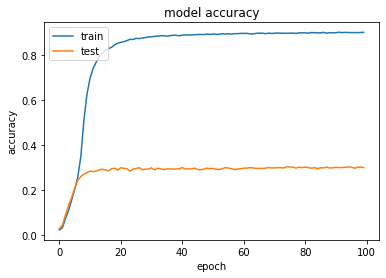

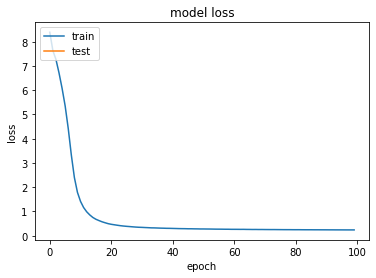

In [171]:
# Plot the training and validation loss 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [172]:
# Create padded sequence for example
skills = 'nursing'
example_sequence = feature_tokenizer.texts_to_sequences([skills])
example_padded = pad_sequences(example_sequence, maxlen=max_length, padding=pad_type, truncating=trunc_type)
example_padded = np.array(example_padded)
print(example_padded)

[[110   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]]


In [173]:
# Make a prediction
prediction = model.predict(example_padded)

In [174]:
# Verify that prediction has correct format
print(prediction[0])
print(len(prediction[0]))  
print(np.sum(prediction[0]))  # should be 1

[1.1171e-05 4.1687e-06 2.0139e-11 ... 1.1451e-05 1.0548e-05 1.1381e-05]
6212
1.0


In [175]:
# Find maximum value in prediction and its index
print(max(prediction[0]))  # confidence in prediction (as a fraction of 1)
print(np.argmax(prediction[0])) 

0.34026584
2621


In [176]:
# Indices of top 5 most probable solutions
indices = np.argpartition(prediction[0], -5)[-5:]
indices = indices[np.argsort(prediction[0][indices])]
indices = list(reversed(indices))
print(indices)

[2621, 4864, 1551, 3429, 3816]


In [177]:
# Save reverse dictionary of labels to encodings
label_to_encoding = dict(list(label_index.items()))
print(label_to_encoding)

encoding_to_label = {}
for k, v in label_to_encoding.items():
  encoding_to_label[v] = k
print(encoding_to_label)

{'customerservicerepresentative': 1, 'salesfloorassociate': 2, 'flatbedtruckdrivingjobriderpolicyavailable': 3, 'salesrepresentative': 4, 'kfcteammember': 5, 'retailcountersales': 6, 'onlinemedicalbillingcodingtraininglearnhome': 7, 'partsdelivery': 8, 'merchandiseassociate': 9, 'hiringvancompanydriversearn70k': 10, 'localcdltruckdriver': 11, 'cdldeliverytruckdriverhomedaily': 12, 'medicalbillingcodingcareertraininglocaltrainingavailable': 13, 'staffountant': 14, 'cdltruckdriverhomedaily': 15, 'onlinemedicalassistantcareertraininglearnhome': 16, 'administrativeassistant': 17, 'salesexecutiveb2bpersonremote': 18, 'warehouseassociate': 19, 'cdllocaldeliverytruckdriverhomedaily': 20, 'retailmerchandiser': 21, 'machineoperator': 22, 'medicalassistantcareertraininglocalmedicaltrainingavailable': 23, 'onlinecriminaljusticecareertraininglearnhome': 24, 'srountant': 25, 'cdldeliverytruckdriverwesttexas': 26, 'dentalassistantgeneraldentistrypractice': 27, 'securityofficer': 28, 'phlebotomist': 

In [178]:
for x in indices:
  print(encoding_to_label[x])

lineassembly
generalworkers
sdetiidonotapply
certifiednursingassistantperdiem
prncna


In [ ]:
# Save model
model.save('model_ver1.h5')

**LOAD THE MODEL**

In [ ]:
load_model = tf.keras.models.load_model('drive/MyDrive/Bangkit 2022/Capstone Project/Final Method/model_ver1.h5')

**EXTRAS**

In [ ]:
# Define the neural network
number_of_labels = len(label_index)
embedding_dim = 64

model = tf.keras.Sequential([
  # Add an Embedding layer expecting input vocab of size 6000, and output embedding dimension of size 64 we set at the top
  tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=300),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
  #tf.keras.layers.Dense(embedding_dim, activation='relu'),

  # use ReLU in place of tanh function since they are very good alternatives of each other.
  #tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(embedding_dim, activation='relu'),

  # Add a Dense layer with 25 units and softmax activation for probability distribution
  tf.keras.layers.Dense(number_of_labels, activation='softmax')
])

model.summary()